In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('/content/gdrive/My Drive/SDN/SomePrograms/SDN_PyQt5/ryu_controller')
sys.path.append('/content/gdrive/My Drive/SDN/SomePrograms/SDN_PyQt5/topo_mininet')

import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib
font = {'size'   : 14}
matplotlib.rc('font', **font)

from AS_static import AS
from ACS_static import ACS
from YenAlgorithm import YenAlgorithm
from get_metric import getMetric

Times = 100
src = 1
dst = 15
N = 10
Max = 100
K = 4

p = 0.1
a = 1
b = 2
q0 = [0.9, 0.5]
Q = 1

# weight_map = getMetric('../topo_mininet/15_nodes.json')
# weight_map = getMetric('/content/gdrive/My Drive/SDN/SomePrograms/SDN_PyQt5/ryu_controller/original/30_nodes.json')
weight_map = getMetric('/content/gdrive/My Drive/SDN/SomePrograms/SDN_PyQt5/topo_mininet/15_nodes.json')
alg_yen = YenAlgorithm(weight_map, src, dst, K)
paths_yen, paths_edges_yen, pw_yen = alg_yen.compute_shortest_paths()
paths_yen, paths_edges_yen, pw_yen

Mounted at /content/gdrive


([[1, 5, 6, 7, 15],
  [1, 12, 13, 9, 4, 15],
  [1, 2, 3, 4, 15],
  [1, 12, 10, 5, 6, 7, 15]],
 [[(1, 5), (5, 6), (6, 7), (7, 15)],
  [(1, 12), (12, 13), (13, 9), (9, 4), (4, 15)],
  [(1, 2), (2, 3), (3, 4), (4, 15)],
  [(1, 12), (12, 10), (10, 5), (5, 6), (6, 7), (7, 15)]],
 [4.5, 5.5, 8.1, 8.6])

In [2]:
sum(pw_yen)

26.700000000000003

In [3]:
number_success_1 = np.zeros(K)
number_success_2 = np.zeros(K)
number_success_3 = np.zeros(K)
sum_1 = []
sum_2 = []
sum_3 = []
time_1 = []
time_2 = []
time_3 = []

In [4]:
number_success_1 = np.zeros(K)
sum_1 = []
time_1 = []
for i in range(Times):
    paths_alg, paths_edges_alg, pw_alg, start, end = [], [], [], None, None
    alg = AS(weight_map, src, dst, K, N, Max, p, a, b, q0, Q)
    while len(pw_alg) != K:
        start = time.time()
        paths_alg, paths_edges_alg, pw_alg = alg.compute_shortest_paths()
        end = time.time()
    time_1.append(end - start)
    sum_1.append(sum(pw_alg))
    for j1 in range(K):
        for item in pw_alg:
            if pw_yen[j1] == item:
                pw_alg.remove(item)
                number_success_1[j1] += 1
                break

In [5]:
number_success_2 = np.zeros(K)
sum_2 = []
time_2 = []
for i in range(Times):
    paths_alg, paths_edges_alg, pw_alg, start, end = [], [], [], None, None
    alg = ACS(weight_map, src, dst, K, N, Max, p, a, b, q0[0], Q)
    while len(pw_alg) != K:
        start = time.time()
        paths_alg, paths_edges_alg, pw_alg = alg.compute_shortest_paths()
        end = time.time()
    time_2.append(end - start)
    sum_2.append(sum(pw_alg))
    for j1 in range(K):
        for item in pw_alg:
            if pw_yen[j1] == item:
                pw_alg.remove(item)
                number_success_2[j1] += 1
                break

In [6]:
number_success_3 = np.zeros(K)
sum_3 = []
time_3 = []
for i in range(Times):
    paths_alg, paths_edges_alg, pw_alg, start, end = [], [], [], None, None
    alg = ACS(weight_map, src, dst, K, N, Max, p, a, b, q0[1], Q)
    while len(pw_alg) != K:
        start = time.time()
        paths_alg, paths_edges_alg, pw_alg = alg.compute_shortest_paths()
        end = time.time()
    time_3.append(end - start)
    sum_3.append(sum(pw_alg))
    for j1 in range(K):
        for item in pw_alg:
            if pw_yen[j1] == item:
                pw_alg.remove(item)
                number_success_3[j1] += 1
                break

In [7]:
print(number_success_1, number_success_2, number_success_3)

[99. 78. 94. 29.] [99. 91. 98.  6.] [100. 100.  99.  31.]


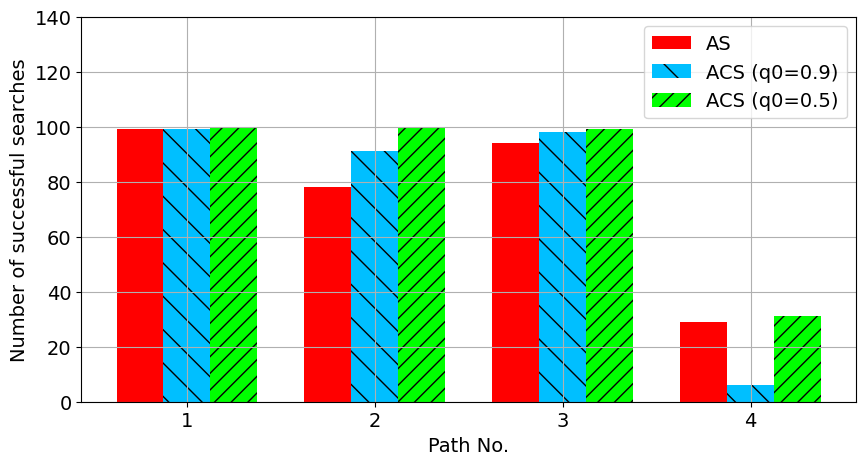

In [8]:
x = np.arange(K)+1
width = 0.25
fig = plt.figure(figsize=(10, 5))
plt.xticks(x)
plt.ylim(0, 1.4*Times)
plt.bar(x-0.25, number_success_1, width, color='red')
plt.bar(x, number_success_2, width, color='deepskyblue', hatch='\\')
plt.bar(x+0.25, number_success_3, width, color='lime', hatch='//')
plt.xlabel("Path No.")
plt.ylabel("Number of successful searches")
plt.legend(["AS", "ACS (q0=0.9)", "ACS (q0=0.5)"], loc="upper right")
plt.grid()
plt.savefig("/content/gdrive/My Drive/SDN/SomePrograms/SDN_PyQt5/ryu_controller/ACO/ACO_nss.png", dpi=200, bbox_inches='tight')

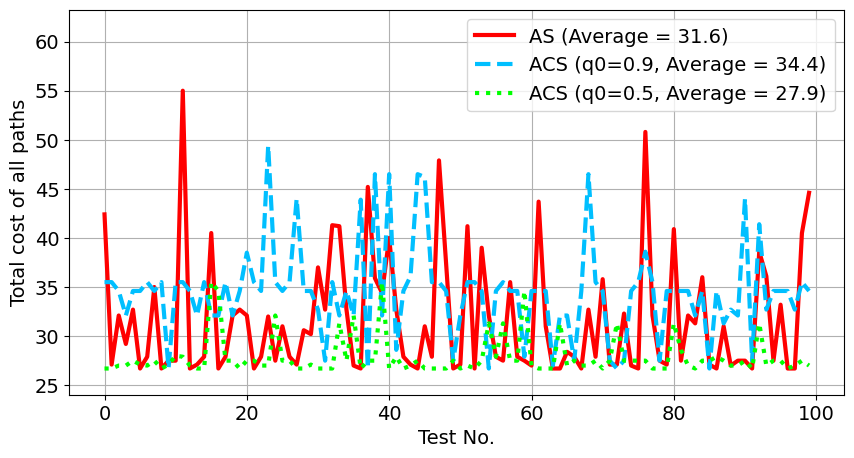

In [9]:
fig = plt.figure(figsize=(10, 5))
avr_1 = round(sum(sum_1)/Times, 1)
avr_2 = round(sum(sum_2)/Times, 1)
avr_3 = round(sum(sum_3)/Times, 1)
plt.ylim(0.9*min(sum_1+sum_2+sum_3), 1.15*max(sum_1+sum_2+sum_3))
plt.plot(sum_1, label = "AS" + " (Average = "+str(avr_1)+")", linewidth = '3', color='red')
plt.plot(sum_2, label = "ACS (q0=0.9, " + "Average = "+str(avr_2)+")", linewidth = '3', color='deepskyblue', linestyle = 'dashed')
plt.plot(sum_3, label = "ACS (q0=0.5, " + "Average = "+str(avr_3)+")", linewidth = '3', color='lime', linestyle = 'dotted')
plt.legend(loc="upper right")
plt.xlabel("Test No.")
plt.ylabel("Total cost of all paths")
plt.grid()
plt.savefig("/content/gdrive/My Drive/SDN/SomePrograms/SDN_PyQt5/ryu_controller/ACO/ACO_sum.png", dpi=200, bbox_inches='tight')

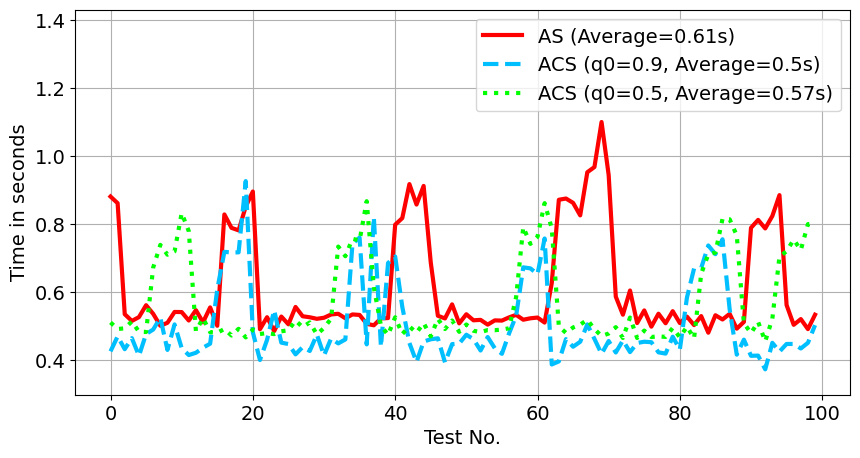

In [12]:
fig = plt.figure(figsize=(10, 5))
avr_1 = round(sum(time_1)/Times, 2)
avr_2 = round(sum(time_2)/Times, 2)
avr_3 = round(sum(time_3)/Times, 2)
plt.ylim(0.8*min(time_1+time_2+time_3), 1.3*max(time_1+time_2+time_3))
plt.plot(time_1, label = "AS" + " (Average="+str(avr_1)+"s)", linewidth = '3', color='red')
plt.plot(time_2, label = "ACS (q0=0.9, " + "Average="+str(avr_2)+"s)", linewidth = '3', color='deepskyblue', linestyle = 'dashed')
plt.plot(time_3, label = "ACS (q0=0.5, " + "Average="+str(avr_3)+"s)", linewidth = '3', color='lime', linestyle = 'dotted')
plt.legend(loc="upper right")
plt.xlabel("Test No.")
plt.ylabel("Time in seconds")
plt.grid()
plt.savefig("/content/gdrive/My Drive/SDN/SomePrograms/SDN_PyQt5/ryu_controller/ACO/ACO_time.png", dpi=200, bbox_inches='tight')